## Basic Example

The code below shows an example of how to calibrate a camera picture

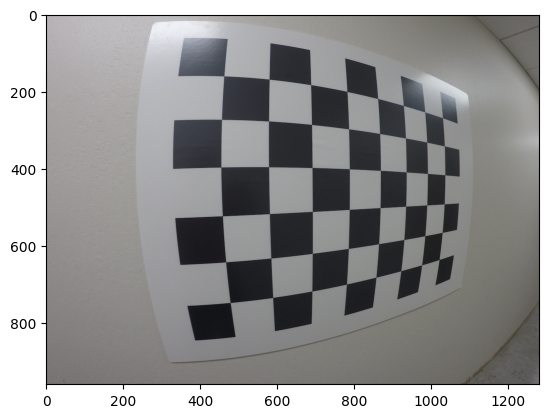

In [81]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in a calibration image
img_copy = mpimg.imread('GOPR0032.jpg')
img = img_copy.copy()
plt.imshow(img)

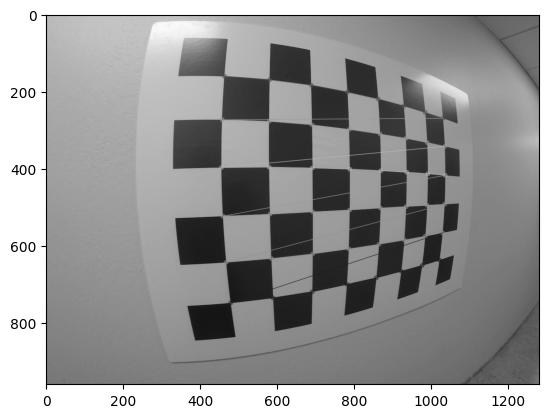

In [79]:
# Array to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., (7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2 ) # x, y  coordinate

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

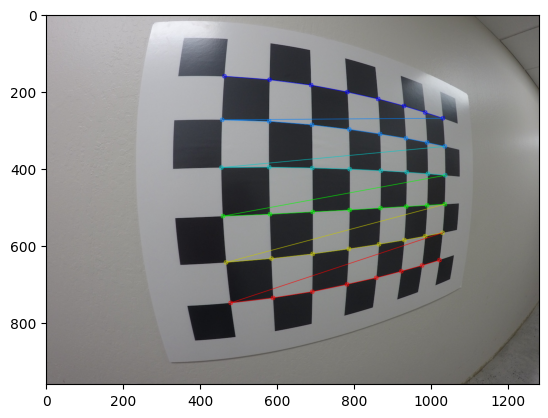

In [71]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)


In [72]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [73]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

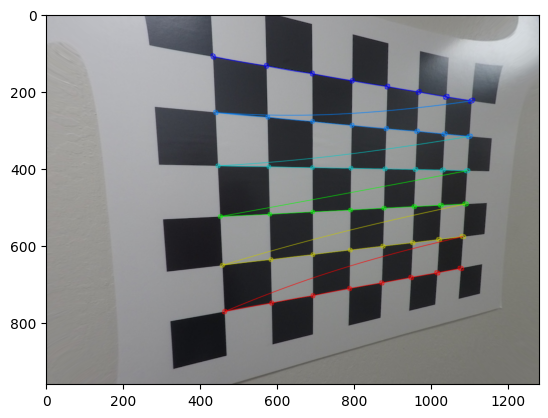

In [74]:
plt.imshow(dst)

In [76]:
gray.shape

(960, 1280)

In [77]:
gray.shape[::-1]

(1280, 960)